# Experimento Eletivo: Medição da espessura de um fio de cabelo por difração

$$\begin{matrix}d = \frac{m\cdot\lambda\sqrt{x^2 + y^2}}{y}, & \sin(\theta) = \frac{y}{\sqrt{x^2 + y^2}}, & y = \frac{y_{\text{max}}+y_{\text{min}}}{4}\end{matrix}$$
$$\sigma_d = \frac{m}{y}\sqrt{
	\sigma^2_\lambda(x^2+y^2) + 
	\frac{(\lambda x)^2}{(x^2+y^2)}\left(
		\sigma^2_x +
		\frac{(\sigma_{y} x)^2}{y^2}
	\right)
}$$
$$\sigma_{\sin(\theta)} = \frac{x}{(x^2+y^2)^{3/2}}\sqrt{(\sigma_x y)^2 + (\sigma_y x)^2}$$
$$
\sigma_y = \frac{\sqrt{\sigma_{y\text{min}}+\sigma_{y\text{max}}}}{4}
$$

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.medicoes import Me, average, sqrt, list2numpy

# Funções para calcular a espussara do fio de cabelo
def espessura(lambda_:Me, x:Me, y:Me, m:int) -> Me:
    messurement = m*lambda_.m*sqrt(x.m**2+y.m**2)/y.m

    x_y_2 = (x.m**2 + y.m**2)
    uncertainty = (m/y.m) * sqrt(
        (lambda_.u**2)*x_y_2 +
        ((lambda_.m* x.m)**2)/x_y_2*
        (x.u**2 + ((y.u*x.m)**2)/(y.m**2))
    )
    
    #return m*lambda_*sqrt(x**2+y**2)/y
    return Me(messurement, uncertainty)
def espessura_arr(lambda_:Me, x:Me, y:list[Me]):
    arr:list[Me] = []
    for m, y_m in enumerate(y):
        arr.append(espessura(lambda_, x, y_m, m+1))
    return arr

def sin_theta(x:Me, y:Me) -> Me:
    messurement = y.m/sqrt(y.m**2 + x.m**2)
    uncertainty = x.m/sqrt((y.m**2 + x.m**2)**3)*sqrt(
        (x.u*y.m)**2 + (y.u*x.m)**2
    )
    return Me(messurement, uncertainty)
def sin_theta_arr(x:Me, y_list:list[Me]):
    arr:list[Me] = []
    for y in y_list:
        arr.append(sin_theta(x, y))
    return arr

# Estilos dos gráficos
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

## Dados

In [65]:
lambda_ = Me(670, 10, 10**-9) # [Hz] - Frequência do laser 

def trena(m: float|int): # [cm] - Trena
    return Me(m, 0.1, 10**-2)
def regua(m: float|int): # [cm] - Regua
    return Me(m, 0.05, 10**-2)
def paqui(m: float|int): # [mm] - Paquimetro
    return Me(m, 0.05, 10**-3)
def micro(m: float|int): # [mm] - Micrometro
    return Me(m, 0.005, 10**-3)

pessoas = ["lucas", "pamela", "gabi"]
dados = {
    pessoas[0]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None,
        "sin_arr": None
    },
    pessoas[1]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None,
        "sin_arr": None
    },
    pessoas[2]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None,
        "sin_arr": None
    },
}

### Cabelo Lucas

In [87]:
pessoa = pessoas[0]
dados[pessoa]["espessura_micrometro"] = micro(0.071)
dados[pessoa]["x"] = trena(267.75)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(53.55)+paqui(34.45))/4,
    (paqui(84.40)+paqui(64.60))/4,
    (paqui(114.90)+paqui(95.10))/4,
    (paqui(145.00)+paqui(127.20))/4,
    (regua(17.26)+regua(15.53))/4
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)
dados[pessoa]["sin_arr"] = sin_theta_arr(
    x = dados[pessoa]["x"],
    y_list = dados[pessoa]["y_arr"]
)

[(9253.0 ± 9.2)e-6,
 (1566.6 ± 1.2)e-5,
 (2207.7 ± 1.5)e-5,
 (2861.1 ± 1.9)e-5,
 (3445.9 ± 7.7)e-5]

### Cabelo Pamela

In [88]:
pessoa = pessoas[1]
dados[pessoa]["espessura_micrometro"] = micro(0.049)
dados[pessoa]["x"] = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(101.20)+paqui(67.15))/4,
    (paqui(155.10)+paqui(123.50))/4,
    (regua(21.35)+regua(18.40))/4
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)
dados[pessoa]["sin_arr"] = sin_theta_arr(
    x = dados[pessoa]["x"],
    y_list = dados[pessoa]["y_arr"]
)

### Cabelo Gabi

In [89]:
pessoa = pessoas[2]
dados[pessoa]["espessura_micrometro"] = micro(0.059)
dados[pessoa]["x"] = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(59.00)+paqui(37.80))/4,
    (paqui(90.75)+paqui(68.95))/4,
    (paqui(122.90)+paqui(102.20))/4,
    (regua(15.8)+regua(13.8))/4,
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)
dados[pessoa]["sin_arr"] = sin_theta_arr(
    x = dados[pessoa]["x"],
    y_list = dados[pessoa]["y_arr"]
)

## Gráficos

## d X m

In [106]:
def plotar_grafico_dxm(data, title:str = "gráfico sem nome"):
    d_arr, du_arr = list2numpy(data["d_arr"])
    scale = 10**6

    d_arr *= scale
    du_arr *= scale

    fig, ax = plt.subplots(1,1)
    ax.errorbar(
        x = [v+1 for v, index in enumerate(d_arr)], 
        y = d_arr, 
        yerr = du_arr,
        fmt = ".",
        capsize=3,
        capthick=1,
        color = "black"
    )
    ax.set_xlim(ax.get_xlim())

    ax.axhline(data["espessura_micrometro"].m*scale,0, ls = "--", color = "blue", linewidth=1)
    # Faixa de incerteza semi-transparente
    ax.fill_between(
        x=np.array(ax.get_xlim()),  # Obtém os limites do eixo x para preencher toda a largura do gráfico
        y1=(data["espessura_micrometro"].m - data["espessura_micrometro"].u)*scale,
        y2=(data["espessura_micrometro"].m + data["espessura_micrometro"].u)*scale,
        color='blue',
        alpha=0.15  # Define a transparência da faixa de incerteza
    )

    ax.set_xlabel('ordem dos máximo de difração')
    ax.set_ylabel('espessura cabelo')
    ax.set_title(title)
    plt.show()
    #plt.savefig('grafico_preliminar', dpi=300, bbox_inches='tight', format='SVG')

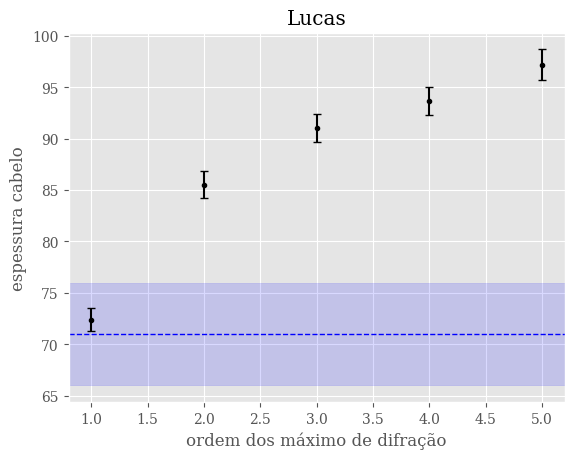

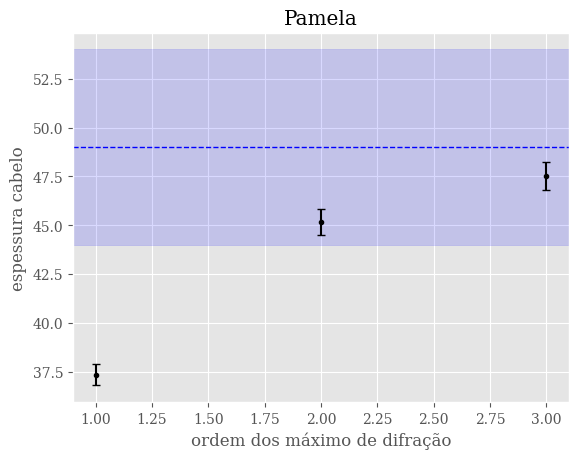

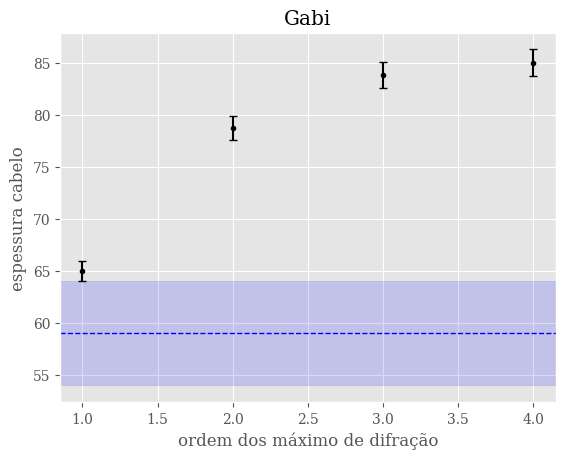

In [109]:
plotar_grafico_dxm(dados["lucas"], "Lucas")
plotar_grafico_dxm(dados["pamela"], "Pamela")
plotar_grafico_dxm(dados["gabi"], "Gabi")

## $\sin(\theta)$ X m

In [104]:
def plotar_grafico_sinxm(data, title:str = "gráfico sem nome"):
    d_arr, du_arr = list2numpy(data["sin_arr"])

    fig, ax = plt.subplots(1,1)
    ax.errorbar(
        x = [v+1 for v, index in enumerate(d_arr)], 
        y = d_arr, 
        yerr = du_arr,
        fmt = ".",
        capsize=3,
        capthick=1,
        color = "orange"
    )
    ax.set_xlim(ax.get_xlim())

    ax.set_xlabel('ordem dos máximo de difração')
    ax.set_ylabel('espessura cabelo')
    ax.set_title(title)
    plt.show()
    #plt.savefig('grafico_preliminar', dpi=300, bbox_inches='tight', format='SVG')

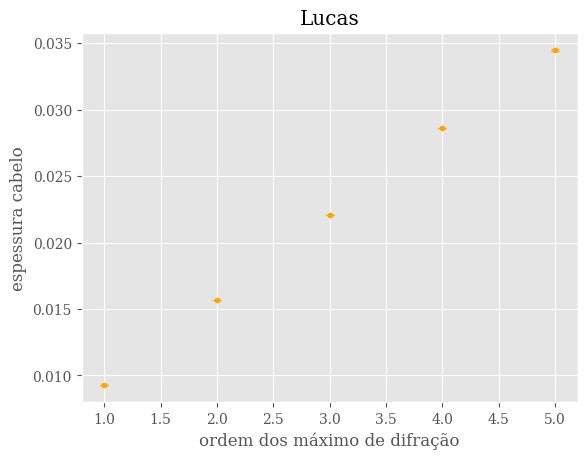

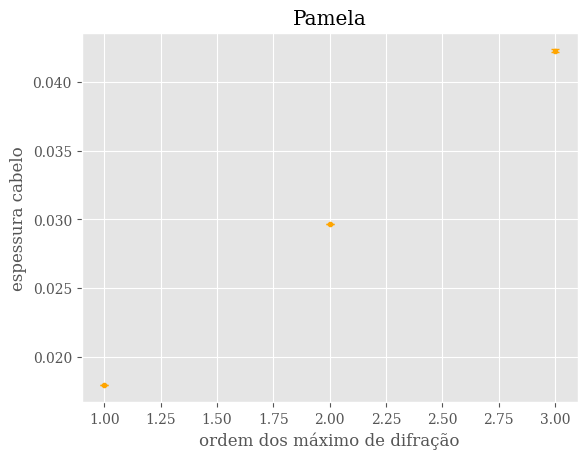

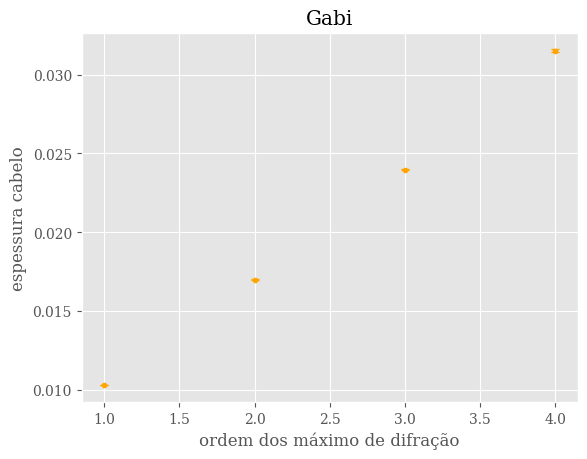

In [108]:
plotar_grafico_sinxm(dados["lucas"], "Lucas")
plotar_grafico_sinxm(dados["pamela"], "Pamela")
plotar_grafico_sinxm(dados["gabi"], "Gabi")